Name: Arjun Y S

Sem: 7, Section: A

Mall Customers dataset

K-means clustering of the mall cusomers





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# URL for the raw CSV file
url = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first 5 rows to check the data
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Select the features for clustering
# We use .iloc to select all rows (:) and columns 3 and 4 (Annual Income and Spending Score)
X = df.iloc[:, [3, 4]].values

# --- This is the key step for your report: Normalization ---
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

# Display the first 5 rows of the scaled data
print("Original Data (first 5 rows):\n", X[:5])
print("\nScaled Data (first 5 rows):\n", X_scaled[:5])

Original Data (first 5 rows):
 [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]

Scaled Data (first 5 rows):
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


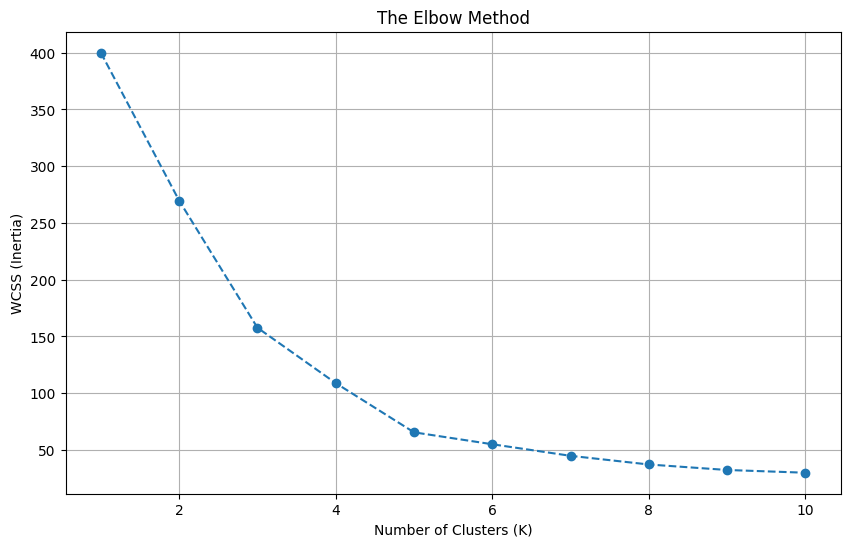

In [4]:
# We need to find the optimal number of clusters (K)
# We will use the Elbow Method

# WCSS stands for "Within-Cluster Sum of Squares"
wcss = []

# We test K from 1 cluster up to 10 clusters
for i in range(1, 11):
    # n_init=10 is the number of times the k-means algorithm will be run with different centroid seeds.
    # 'k-means++' is an advanced initialization method to avoid random initialization trap
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)

    # .inertia_ gives us the WCSS value
    wcss.append(kmeans.inertia_)

# --- Now we plot the results ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

in the elbow-graph above we notice that : The goal is to find the point where the "return" (decrease in WCSS) for adding another cluster becomes much smaller.

The drop from 1 to 2 is massive.

The drop from 2 to 3 is very large.

The drop from 3 to 4 is still quite significant.

The drop from 4 to 5 is also significant.

...but the drop from 5 to 6 is tiny. The line becomes almost flat.

That point of diminishing returns, where the line flattens out, is K=5.

This means the "sweet spot" for our data is 5 clusters. We've found our 'K' =5


In [5]:
# We chose 5 as the optimal K
k = 5

# Create the final KMeans model
kmeans_final = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)

# Fit the model to our scaled data and predict the cluster for each data point
y_kmeans = kmeans_final.fit_predict(X_scaled)

# --- Add these new cluster labels back to our original DataFrame ---
# This makes it easy to see which customer is in which group
df['Cluster'] = y_kmeans

# Display the first 10 rows to see the new 'Cluster' column
print(df.head(10))

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
5        2  
6        4  
7        2  
8        4  
9        2  


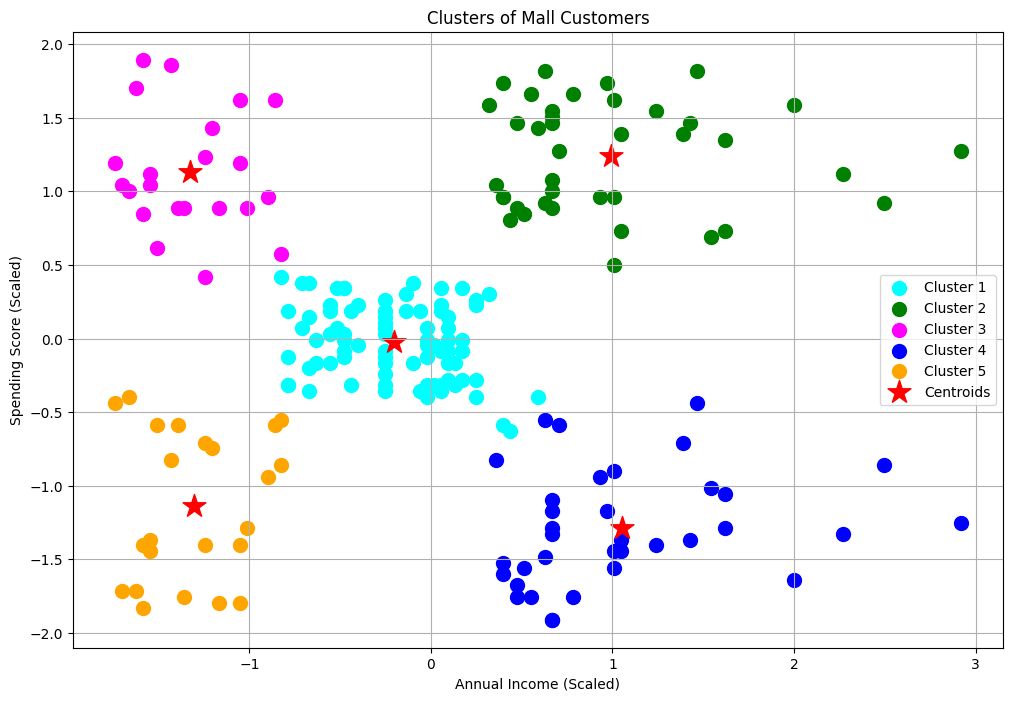

In [6]:
#Last Step: Visualizing the customer segments

plt.figure(figsize=(12, 8))

# We'll plot each of the 5 clusters one by one
# X_scaled[y_kmeans == 0, 0] means:
#   Select all rows from X_scaled where the cluster (y_kmeans) is 0
#   ...and get the first column (index 0), which is our 'Annual Income'
# X_scaled[y_kmeans == 0, 1] gets the second column (index 1), 'Spending Score'

plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='cyan', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='magenta', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='blue', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='orange', label='Cluster 5')

# --- Plot the Centroids ---
# These are the "centers" of each cluster
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids', marker='*')

# --- Add titles and labels ---
plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

The ***Spending Score*** indicates the customers willingness to spend in the mall.
